# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Data Description**

In [ ]:
df = pd.read_csv("/content/AAPL.csv")

In [ ]:
# Mengubah kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menyaring data untuk tahun 1980
df = df[df['Date'].dt.year == 1985]

df.set_index('Date', inplace=True)


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-02,0.130022,0.130022,0.124442,0.124442,0.097130,175302400
1985-01-03,0.126674,0.130022,0.126674,0.126674,0.098872,166611200
1985-01-04,0.126674,0.127232,0.125000,0.126674,0.098872,137267200
1985-01-07,0.126674,0.127232,0.126116,0.126116,0.098436,170912000
1985-01-08,0.126116,0.127232,0.125000,0.125000,0.097565,141120000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1985-01-02 to 1985-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,0.091057,0.092023,0.089937,0.090233,0.070429,1.805249e+08
std,0.020420,0.020658,0.020007,0.020196,0.015764,1.225049e+08
min,0.065290,0.065848,0.064732,0.064732,0.050525,2.150400e+07
25%,0.075056,0.075614,0.073661,0.073661,0.057494,9.394560e+07
50%,0.088170,0.089286,0.086217,0.087612,0.068383,1.455328e+08
75%,0.099330,0.101004,0.098214,0.098772,0.077094,2.366616e+08
max,0.136719,0.138951,0.136719,0.136719,0.106712,7.339808e+08


# **Pre Processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1025 to 1276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.8 KB


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.groupby('Date').mean().reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-02,0.130022,0.130022,0.124442,0.124442,0.097130,175302400.0
1,1985-01-03,0.126674,0.130022,0.126674,0.126674,0.098872,166611200.0
2,1985-01-04,0.126674,0.127232,0.125000,0.126674,0.098872,137267200.0
3,1985-01-07,0.126674,0.127232,0.126116,0.126116,0.098436,170912000.0
4,1985-01-08,0.126116,0.127232,0.125000,0.125000,0.097565,141120000.0
...,...,...,...,...,...,...,...
247,1985-12-24,0.097656,0.098214,0.096540,0.097098,0.075787,64601600.0
248,1985-12-26,0.097098,0.098214,0.096540,0.097098,0.075787,45852800.0
249,1985-12-27,0.097098,0.101004,0.097098,0.099888,0.077965,122886400.0
250,1985-12-30,0.099888,0.101004,0.098772,0.099330,0.077529,107676800.0


# **Visualisasi**

In [ ]:
# Mengonversi kolom 'date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Membuat grafik interaktif
fig = px.line(df, x='Date', y='Adj Close', title='Apple Stock Price Over Time', labels={'Date': 'Date', 'Adj Close': 'Adj Close'})

# Menambah kostumisasi slider dan sumbu-x
fig.update_xaxes(
    rangeslider_visible=True,
    rangeslider_thickness=0.1,  # Ketebalan slider
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    tickformat="%b %Y"  # Format tanggal yang lebih singkat
)

# Memusatkan judul dan mengatur hovermode
fig.update_layout(
    title='Apple Stock Price Over Time',
    title_x=0.5,
    hovermode="x unified"  # Menampilkan tooltip secara komprehensif saat hover
)

# Mengatur warna latar belakang slider dan warna garisnya
fig.update_xaxes(
    rangeslider_bgcolor="lightblue",
    rangeslider_bordercolor="darkblue",
    rangeslider_borderwidth=1
)

# Menampilkan grafik
fig.show()

Berdasarkan dari grafik harga saham Apple (1990-2020), pola data yang diperoleh menunjukkan tren naik. Pada periode 1990-2000 harga saham cenderung datar, kemudian periode 2000-2010 mulai menunjukkan pertumbuhan lambat, dan pada periode 2010-2020 mengalami kenaikan yang sangat tinggi.


# **Box Cox**



> Memeriksa Kestasioneran Data Terhadap Variansi menggunakan Box-Cox







In [ ]:
from scipy.stats import boxcox
from scipy import stats

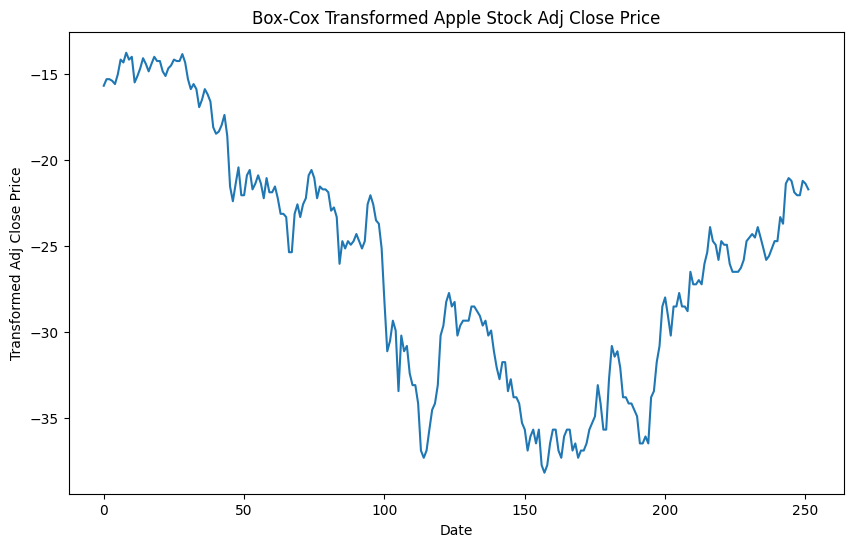

Optimal lambda: -1.319469487558577


In [ ]:
Adjclose_prices = df['Adj Close']
Adjclose_prices = Adjclose_prices[Adjclose_prices > 0]

# Terapkan transformasi Box-Cox
transformed_data, lambda_value = stats.boxcox(Adjclose_prices)

# Plot data setelah transformasi Box-Cox
plt.figure(figsize=(10, 6))
plt.plot(transformed_data)
plt.title('Box-Cox Transformed Apple Stock Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Transformed Adj Close Price')
plt.show()

# Menampilkan nilai lambda
print("Optimal lambda:", lambda_value)

Kode ini bertujuan untuk menormalkan data harga penutupan Bitcoin dengan transformasi Box-Cox, yang mengurangi skewness agar data mendekati distribusi normal. Langkah-langkahnya meliputi:
1.   Filter Data: Memastikan hanya nilai positif untuk transformasi.
2.   Transformasi Box-Cox: Mengubah data agar lebih normal dengan parameter optimal lambda.
3. Visualisasi: Menampilkan pola data setelah transformasi.
4. Nilai Lambda: Menunjukkan parameter transformasi yang digunakan.

Transformasi ini penting untuk analisis statistik atau model prediktif agar lebih akurat.



> Melakukan Transformasi



Lambda Box-Cox: -1.3194995857789027


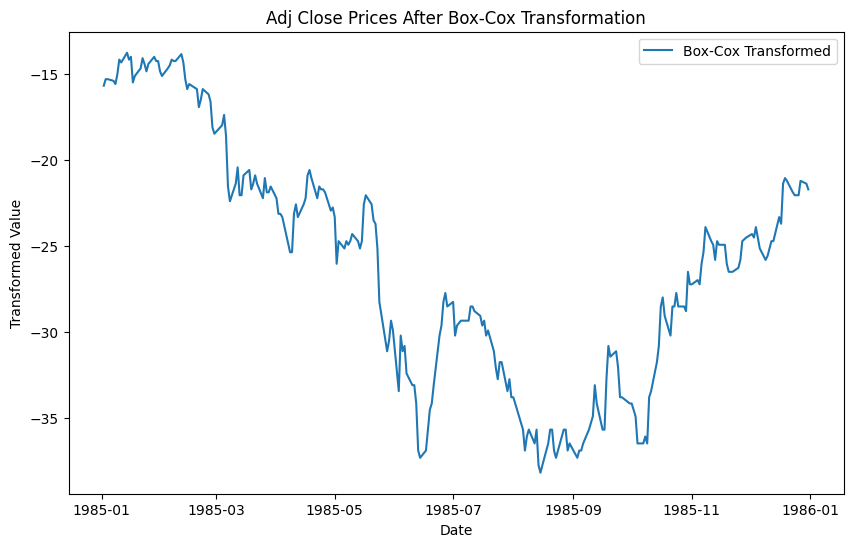

In [ ]:
from scipy.stats import boxcox

# Pastikan data positif
Adjclose_prices = df['Adj Close'] + 1e-6  # Menambahkan offset kecil untuk menghindari nilai nol

# Transformasi Box-Cox
Adjclose_boxcox, lambda_val = boxcox(Adjclose_prices)

# Box-Cox transform dengan indeks tetap
Adjclose_boxcox = pd.Series(boxcox(Adjclose_prices)[0], index=Adjclose_prices.index)

print(f"Lambda Box-Cox: {lambda_val}")

# Plot data setelah transformasi
plt.figure(figsize=(10, 6))
plt.plot(Adjclose_boxcox, label='Box-Cox Transformed')
plt.title('Adj Close Prices After Box-Cox Transformation')
plt.xlabel('Date')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

Kode ini bertujuan untuk mengaplikasikan nilai lambda optimal dari transformasi Box-Cox pada kolom Adj Close, kemudian memvisualisasikan hasilnya. Langkah ini mempermudah analisis data yang lebih mendekati distribusi normal, sehingga lebih sesuai untuk analisis statistik atau prediksi.

# **Uji ADF & Differencing**

Dilakukan uji ADF untuk mengecek ke stasioneran data

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series):
    result = adfuller(series)  # Menghilangkan missing values
    # Membuat dataframe untuk hasil uji ADF
    adf_result = pd.DataFrame({
        'Metric': ['ADF Statistic', 'p-value', '1% Critical Value', '5% Critical Value', '10% Critical Value', 'Stationarity'],
        'Value': [result[0], result[1], result[4]['1%'], result[4]['5%'], result[4]['10%'], 'Stasioner' if result[1] < 0.05 else 'Tidak Stasioner']
    })
    return adf_result

# Pertama, kita akan uji data tanpa differencing
print("Uji ADF pada data asli (tanpa differencing):")
adf_table = test_stationarity(Adjclose_boxcox)
adf_table


Uji ADF pada data asli (tanpa differencing):


,Metric,Value
0,ADF Statistic,-1.678405
1,p-value,0.442272
2,1% Critical Value,-3.457105
3,5% Critical Value,-2.873314
4,10% Critical Value,-2.573044
5,Stationarity,Tidak Stasioner


Kode ini menguji stasionaritas data time series menggunakan ADF Test. Langkahnya:

Format Tanggal dan Indeks: Ubah Date ke format datetime dan jadikan indeks.
ADF Test: Fungsi test_stationarity menjalankan uji ADF untuk memeriksa apakah data stasioner:
Jika p-value < 0.05, data dianggap stasioner.
Jika p-value ≥ 0.05, data tidak stasioner.
Uji Data Asli: Data Adjclose_boxcox diuji tanpa differencing, dan hasilnya ditampilkan dalam tabel.
Uji ini penting untuk memastikan data sesuai untuk model time series seperti ARIMA.

In [ ]:
# Melakukan Differencing (pertama)
Adjclose_boxcox_diff = pd.Series(Adjclose_boxcox).diff().dropna()

# Uji stasioneritas pada hasil differencing pertama
print("Uji ADF setelah differencing pertama:")
adf_table_diff = test_stationarity(Adjclose_boxcox_diff)
adf_table_diff

Uji ADF setelah differencing pertama:


,Metric,Value
0,ADF Statistic,-7.056985
1,p-value,0.0
2,1% Critical Value,-3.457105
3,5% Critical Value,-2.873314
4,10% Critical Value,-2.573044
5,Stationarity,Stasioner


Kode ini mencoba membuat data lebih stasioner dengan differencing pertama. Data hasil differencing diuji kembali menggunakan ADF Test untuk memastikan bahwa tren atau pola non-stasioner telah dihilangkan, sehingga data siap untuk analisis atau pemodelan time series.

# **Plot ACF dan PACF**

Plot ACF (Autocorrelation Function) dan PACF(Partial Autocorrelation Function) adalah alat yang digunakan untuk menganalisis sifat korelasi dalam data deret waktu, terutama untuk menentukan model ARIMA yang sesuai.

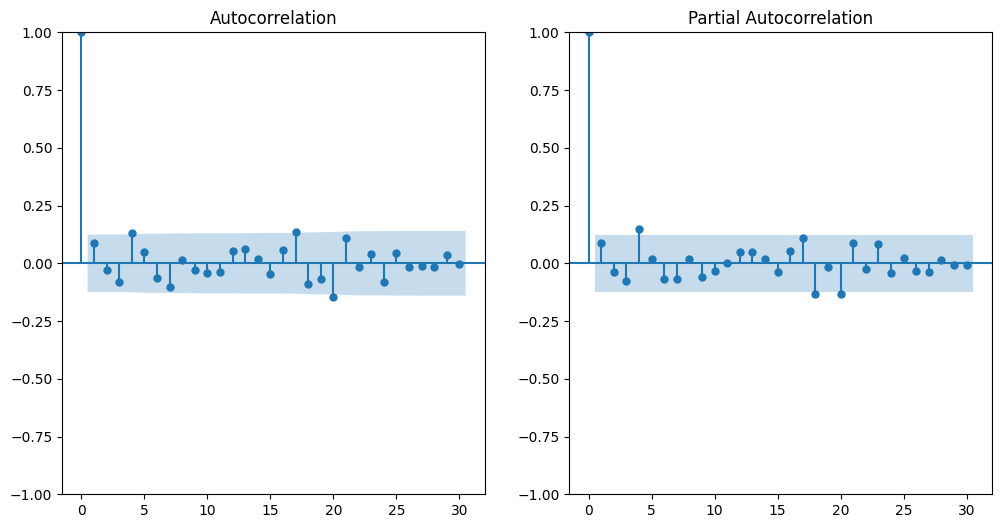

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(Adjclose_boxcox_diff, lags=30, ax=plt.subplot(121))
plot_pacf(Adjclose_boxcox_diff, lags=30, ax=plt.subplot(122))
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Hitung nilai ACF dan PACF
acf_values = acf(Adjclose_boxcox_diff, fft=False, nlags=30)
pacf_values = pacf(Adjclose_boxcox_diff, nlags=30)

# Ambil threshold signifikan
conf_level = 1.96 / (len(Adjclose_boxcox_diff)**0.5)

# Deteksi nilai q dari ACF
q_candidates = [lag for lag, value in enumerate(acf_values) if abs(value) > conf_level and lag > 0]

# Deteksi nilai p dari PACF
p_candidates = [lag for lag, value in enumerate(pacf_values) if abs(value) > conf_level and lag > 0]

# Output hasil
print(f"Nilai-nilai q yang mungkin dari ACF: {q_candidates}")
print(f"Nilai-nilai p yang mungkin dari PACF: {p_candidates}")


Nilai-nilai q yang mungkin dari ACF: [4, 17, 20]
Nilai-nilai p yang mungkin dari PACF: [4, 18, 20]


Berdasarkan kedua plot ini, nilai-nilai q yang mungkin dari ACF adalah [4, 17, 20], dan nilai-nilai p yang mungkin dari PACF adalah [4, 18, 20].


# **Pilih Model Terbaik (AIC)**

Pemilihan model terbaik dilakukan berdasarkan nilai AIC (Akaike Information Criterion) yang paling kecil. Dalam hal ini, terdapat 9 kemungkinan model yang diuji, yaitu kombinasi ACF[4,17,20] dan PACF[4,18,20]. Model-model tersebut akan diuji untuk mencari nilai AIC terendah untuk mendapatkan model terbaik.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings

# Matikan peringatan
warnings.filterwarnings("ignore")

# Data stasioner hasil differencing
data_stationary = Adjclose_boxcox_diff

# Tentukan range parameter p, d, q
p = [4, 18, 20]  # Range p (AR term)
d = [1]          # d berdasarkan differencing
q = [4, 17, 20] # Range q (MA term)

# Simpan hasil
results_list = []

# Loop untuk mencoba berbagai kombinasi p, d, q
for i in p:
    for j in d:
        for k in q:
            try:
                # Tentukan model ARIMA
                model = ARIMA(data_stationary, order=(i, j, k))
                results = model.fit()

                # Simpan hasil (parameter dan AIC)
                results_list.append({
                    'Order (p, d, q)': (i, j, k),
                    'AIC': results.aic
                })
            except Exception as e:
                continue

# Konversi hasil ke DataFrame untuk analisis
results_df = pd.DataFrame(results_list).sort_values(by='AIC', ascending=True)

# Tampilkan model terbaik
print(f"Model terbaik: ARIMA{results_df.iloc[0]['Order (p, d, q)']} dengan AIC: {results_df.iloc[0]['AIC']}")

# Tampilkan seluruh hasil
print("\nDaftar semua model ARIMA yang diuji:")
print(results_df)

Model terbaik: ARIMA(4, 1, 4) dengan AIC: 720.562832421257

Daftar semua model ARIMA yang diuji:
  Order (p, d, q)         AIC
0       (4, 1, 4)  720.562832
2      (4, 1, 20)  730.270118
3      (18, 1, 4)  731.311502
4     (18, 1, 17)  732.492825
6      (20, 1, 4)  733.897301
1      (4, 1, 17)  734.669139
7     (20, 1, 17)  737.660116
5     (18, 1, 20)  737.896052
8     (20, 1, 20)  739.997788


Setalah melakukan uji AIC, kami mendapatkan model terbaik yaitu **ARIMA(4,1,4)** dengan nilai AIC yaitu:
**720.562832421257**





# **Estimasi Parameter (Maximum Likelihood)**

Estimasi parameter model ARIMA menggunakan metode Maximum Likelihood bertujuan untuk menemukan nilai parameter yang memaksimalkan probabilitas data. Parameter yang diestimasi meliputi  Autoregressive (AR), Moving Average (MA), dan variansi noise/error (sigma²).

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Matikan peringatan
warnings.filterwarnings("ignore")

best_order = (4, 1, 4)

# Fit model ARIMA
model = ARIMA(Adjclose_boxcox_diff, order=best_order)
fitted_model = model.fit()

# Menampilkan parameter hasil estimasi
print("Hasil Estimasi Parameter:")
print(fitted_model.summary())

Hasil Estimasi Parameter:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -351.281
Date:                Mon, 30 Dec 2024   AIC                            720.563
Time:                        12:53:54   BIC                            752.256
Sample:                             0   HQIC                           733.318
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4120      0.339     -1.216      0.224      -1.076       0.252
ar.L2         -0.6840      0.115     -5.930      0.000      -0.910      -0.458
ar.L3         -0.6077     

In [ ]:
# Mengambil parameter dan p-value
params = fitted_model.params  # Parameter ARIMA
pvalues = fitted_model.pvalues  # p-value untuk parameter

# Menampilkan hasil parameter dan p-value
print("Parameter ARIMA:")
print(params)
print("\nP-Values untuk Parameter:")
print(pvalues)

# Mengecek parameter signifikan
print("\nParameter signifikan (p-value < 0.05):")
significant_params = params[pvalues < 0.05]
print(significant_params)

Parameter ARIMA:
ar.L1    -0.412004
ar.L2    -0.684031
ar.L3    -0.607668
ar.L4     0.130327
ma.L1    -0.484400
ma.L2     0.241531
ma.L3    -0.113741
ma.L4    -0.610937
sigma2    0.956085
dtype: float64

P-Values untuk Parameter:
ar.L1     2.239111e-01
ar.L2     3.035989e-09
ar.L3     5.545875e-02
ar.L4     7.502219e-02
ma.L1     1.582000e-01
ma.L2     5.134019e-01
ma.L3     7.485436e-01
ma.L4     5.126993e-02
sigma2    1.746936e-39
dtype: float64

Parameter signifikan (p-value < 0.05):
ar.L2    -0.684031
sigma2    0.956085
dtype: float64


catetan:
P-value menunjukkan signifikansi parameter:
Jika p-value < 0.05, parameter dianggap signifikan.
Jika p-value ≥ 0.05, parameter tidak signifikan

Setelah melakukan Estimasi parameter model ARIMA menggunakan metode Maximum Likelihood kami mendapkan 2 parameter yang signipifak dengan niali p-value < 0.05 yaitu:


*   ar.L2    -0.684031

*   sigma2    0.956085



# **Uji Kelayakan Ljung Box**

Uji Ljung-Box adalah uji statistik yang digunakan untuk mengetahui apakah residual (error) dari model bebas dari autokorelasi, yaitu apakah residual tidak memiliki pola berulang.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_results = acorr_ljungbox(fitted_model.resid, lags=[10], return_df=True)
print("\nLjung-Box Test Results:")
print(ljung_box_results)


Ljung-Box Test Results:
     lb_stat  lb_pvalue
10  4.061042   0.944551


lb_pvalue > 0.05 berarti Terima H0. artinya residual tidak memiliki autokorelasi signifikan (model cukup baik)

Berdasarkan hasil dari Ljung-Box Test, lb_pvalue > 0.05 yaitu 0.944551  > 0.05,  Ini berarti residual model bebas dari autokorelasi, sehingga model dianggap layak.


# **Uji Kenormalan Sisaan**

Model ARIMA mengasumsikan bahwa sisaan terdistribusi secara normal, jika asumsi tidak terpenuhi maka hasil model tidak valid atau tidak dapat diandalkan.

Jika p-value > 0.05 data dianggap berdistribusi normal dan model dapat diandalkan.

In [ ]:
from scipy.stats import shapiro

shapiro_test = shapiro(fitted_model.resid)
print("\nShapiro-Wilk Test for Normality of Residuals:")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")


Shapiro-Wilk Test for Normality of Residuals:
Statistic: 0.9846118367940551, p-value: 0.008275235245186129


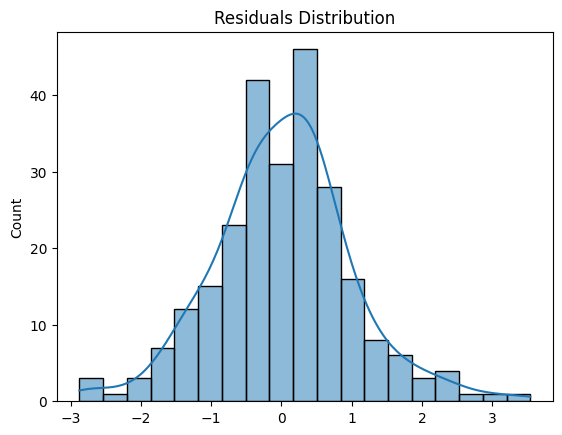

In [ ]:
from scipy import stats

sns.histplot(fitted_model.resid, kde=True)
plt.title('Residuals Distribution')
plt.show()

Berdasarkan hasil Uji Shapiro-Walk dan plot residual, p-value > 0.05 dan distribusi residual terdistribusi disekitar nilai 0. sehingga residual berdistribusi normal dan model dapat diandalkan.

# **Forecasting**

Forecasting dilakukan pada model yang telah dilatih menggunakan ARIMA(4,1,4) untuk memprediksi 12 langkah kedepan. Data aktual yang digunakan adalah 12 langkah terakhir dari dataset.


In [ ]:
from sklearn.metrics import mean_squared_error
forecast = fitted_model.forecast(steps=12)
actual = df['Adj Close'][-12:].values

print(f"\nForecasted Values: {forecast[:12]}")


Forecasted Values: 251   -0.037187
252    0.094609
253    0.014088
254    0.056579
255    0.052530
256    0.091239
257    0.041746
258    0.043658
259    0.052675
260    0.082772
261    0.056592
262    0.041561
Name: predicted_mean, dtype: float64


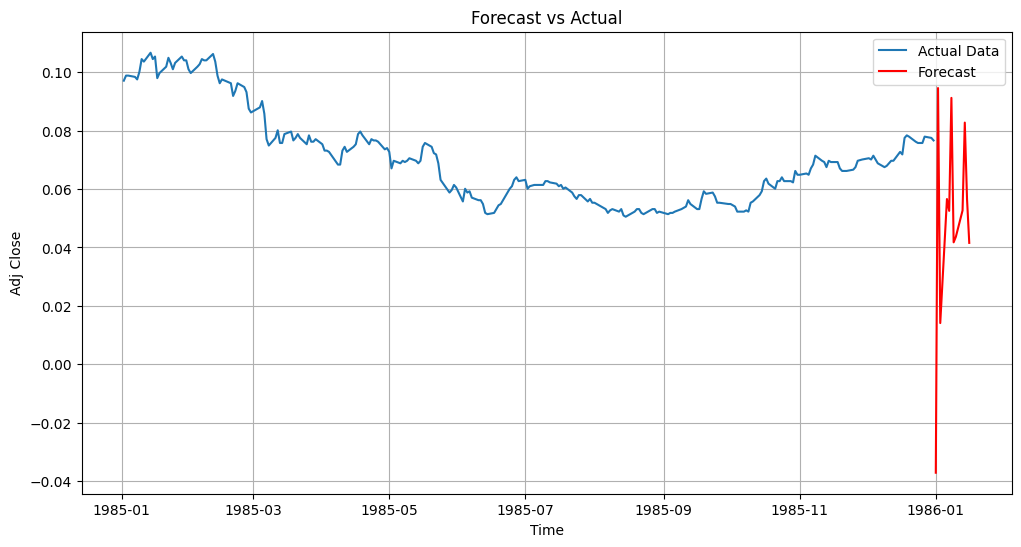

In [ ]:
# Plot Forecast
forecast_index = pd.date_range(
    start=df.index[-1] + pd.Timedelta(days=1),
    periods=12,
    freq='B'  # Ubah sesuai dengan frekuensi dataset
)

plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Actual Data')
plt.plot(forecast_index, forecast[:12], label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()
plt.grid()
plt.show()

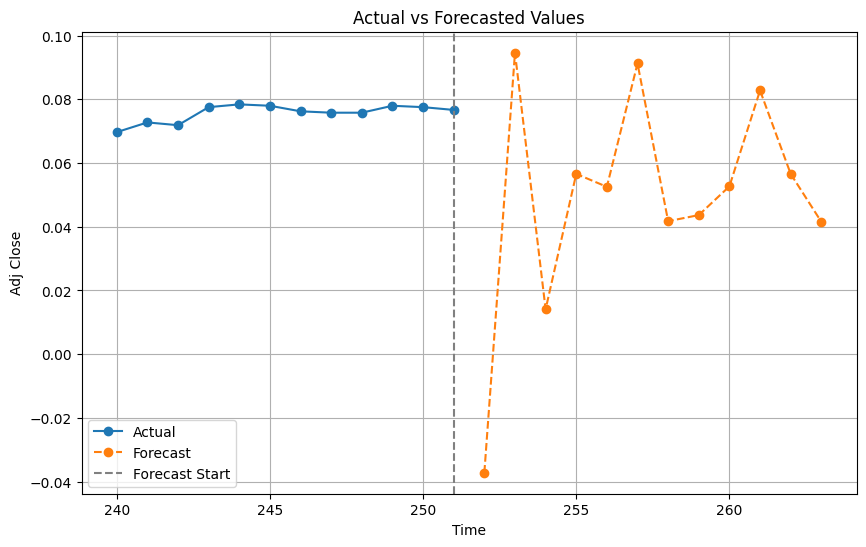

In [ ]:
# Plotting actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(df['Adj Close']) - 12, len(df['Adj Close'])), actual, label='Actual', marker='o')
plt.plot(range(len(df['Adj Close']), len(df['Adj Close']) + 12), forecast, label='Forecast', marker='o', linestyle='--')
plt.axvline(len(df['Adj Close']) - 1, color='gray', linestyle='--', label='Forecast Start')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()
plt.grid()
plt.show()

Dari hasil Plot menunjukan bahwa hasil forecasting mengikuti tren dari data aktual, meskipun terjadi deviasi yang signifikan antara nilai prediksi dan nilai aktual.

# **RMSE**

In [ ]:
rmse = np.sqrt(mean_squared_error(actual, forecast[:12]))
print(f"RMSE of the Forecast: {rmse}")

RMSE of the Forecast: 0.041805082647783515


Nilai RMSE sebesar 0.0458 menunjukan bahwa rata-rata kesalahan prediksi adalah 0.0458 satuan (dalam skala data). Nilai ini cukup kecil, menandakan model memiliki akurasi yang baik.
